**Data Analysis (Final Challenge)**

```
@ Daniel Broś, Hubert Pamuła
Applied Computer Science, FAIS UJ
```






## 1. **Ładowanie danych**

In [ ]:
# Importing some of the libraries needed
import pandas as pd               # dataframes
import numpy as np                # math operations
import matplotlib.pyplot as plt   # plotting charts

In [ ]:
# a) Loading the initial dataset using the URL adres to its source
from pathlib import Path          # for handling paths on different devices
from zipfile import ZipFile       # for extracting data from zip archives
import urllib.request             # accessing data using URL addresses

# Creating an auxilary function for downloading the dataset
def load_data():
    """ This auxilary function downloads and save the initial dataset.
    It returns a pandas dataframe """

    zip_archive_path = Path("datasets/power_consumption.csv.zip")

    if not zip_archive_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "http://archive.ics.uci.edu/static/public/849/power+consumption+of+tetouan+city.zip"
        urllib.request.urlretrieve(url, zip_archive_path)
        with ZipFile(zip_archive_path, 'r') as f:
            f.extractall(path="datasets")

    return pd.read_csv(Path("datasets/Tetuan City power consumption.csv"),
                       parse_dates=['DateTime'])  # Parsing the date

# Loading the data
data = load_data()

# Showing the first 5 records of the pandas dataframe prepared
data.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Widać, że dane były aktualizowane co 10 minut, więc możemy zobaczyć jak się zachowywały w ciągu doby, dnia, tygodnia, miesiąca.



---


## 2. **Wstępne przetwarzanie**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
# Wprowadzenie krótszych nazw
data.columns = ["date", "temperature", "humidity", "wind", "general_flow", "flow", "zone_1", "zone_2", "zone_3"]
# Sortowanie zgodnie z datą oraz ustawienie daty jako indeks
data = data.sort_values("date").set_index("date")
# Pozbywamy się duplikatów, jeżeli są
data = data.drop_duplicates()

In [ ]:
# Teraz zobaczmy okres (od rok-miesiąc-dzień)
data.head(1)

,temperature,humidity,wind,general_flow,flow,zone_1,zone_2,zone_3
date,,,,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.6962,16128.87538,20240.96386


In [ ]:
# Do rok-miesiąc-dzień
data.tail(1)

,temperature,humidity,wind,general_flow,flow,zone_1,zone_2,zone_3
date,,,,,,,,
2017-12-30 23:50:00,6.58,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.4982


Ok, mamy dane za cały 2017 rok, czyli zmian w ciągu kilku lat nie zobaczymy.

Rozdzielmy zbiór danych na 3 zbiory w zależności od tego jaka jest strefa w tym naszym badanym mieście, żeby łatwiej było zwizualizować konkretne przykłady i zrobić kilka eksperymentów:

In [ ]:
y1 = data['zone_1']
y2 = data['zone_2']
y3 = data['zone_3']

In [ ]:
y1.head(1)

date
2017-01-01    34055.6962
Name: zone_1, dtype: float64

In [ ]:
y2.head(1)

date
2017-01-01    16128.87538
Name: zone_2, dtype: float64

In [ ]:
y3.head(1)

date
2017-01-01    20240.96386
Name: zone_3, dtype: float64



---


## 3. **Analiza szeregu czasowego**

Spróbujmy wykryć sezonowość na przykładzie zmian zużycia energii w 1. strefie/obszarze:

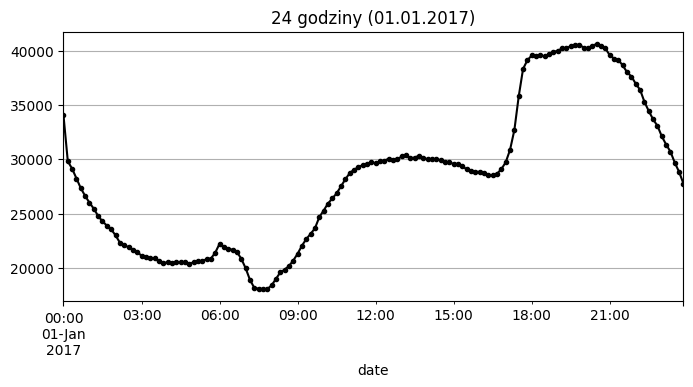

In [ ]:
import matplotlib.pyplot as plt

y1["2017-01-01":"2017-01-01"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("24 godziny (01.01.2017)")
plt.show()

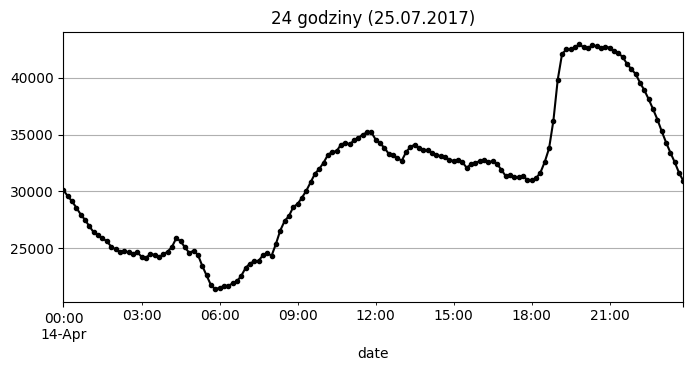

In [ ]:
y1["2017-04-14":"2017-04-14"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("24 godziny (25.07.2017)")
plt.show()

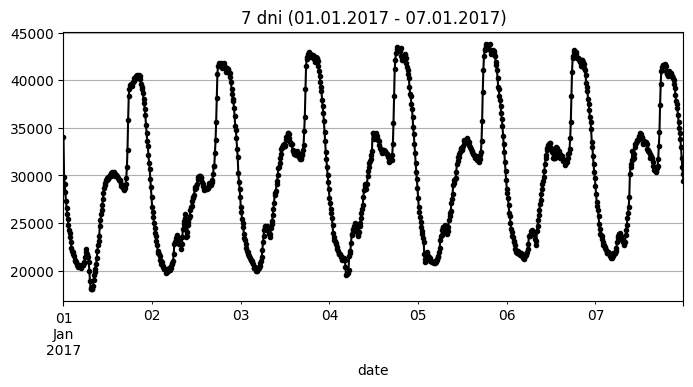

In [ ]:
y1["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("7 dni (01.01.2017 - 07.01.2017)")
plt.show()

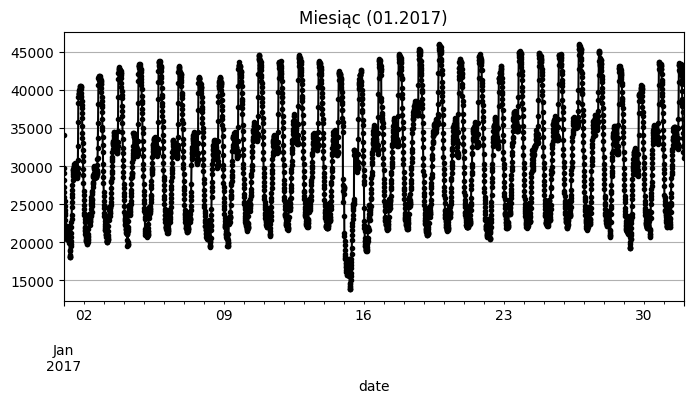

In [ ]:
y1["2017-01":"2017-01"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black')
plt.title("Miesiąc (01.2017)")
plt.show()

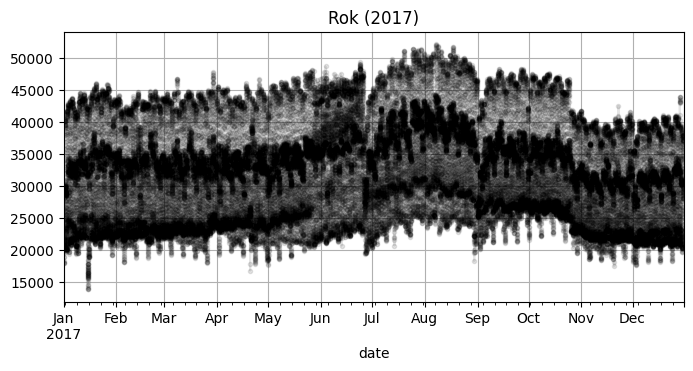

In [ ]:
y1["2017-01":"2017-12"].plot(grid=True, marker=".", figsize=(8, 3.5), color='black', alpha=0.1)
plt.title("Rok (2017)")
plt.show()

No, widać od razu sezonowość w ciągu dnia, czyli co dzień powtarzają się wartości. Sprawdźmy teraz na wszelki wypadek strefy 2. oraz 3., by nie było później żadnych niespodzianek:

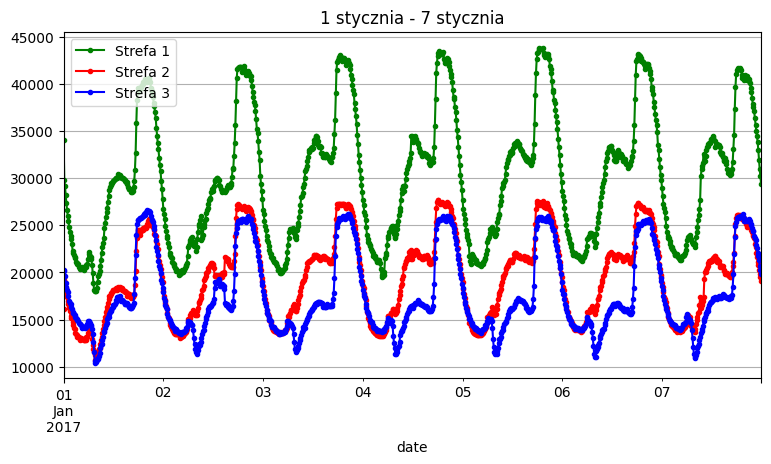

In [ ]:
y1["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='green', label='Strefa 1')
y2["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='red', label='Strefa 2')
y3["2017-01-01":"2017-01-07"].plot(grid=True, marker=".", figsize=(9, 4.5), color='blue', label='Strefa 3')
plt.legend()
plt.title("1 stycznia - 7 stycznia")
plt.show()

Dobra, to teraz widać czym się różnią te strefy. Pierwsza jest najbardziej zachłanna, druga tak już znacznie mniej, no i trzecia strefa ma malutkie wartości...

Skoro trend jest tak wyraźny (zresztą to jest dosyć typowy obraz dla problemu analizy danych czeregów czasowych), to możemy uznać **prognozowanie naiwne** (zwyczajne kopiowanie przeszłej wartości z popredniego dnia w celu prognozowania kolejnego) za świetny **punkt odniesienia**.

Aby zwizualizować te prognozy naiwne, nałóżmy na siebie szereg czasowy przykładowo dla strefy 1. w okresie pierwszych 6 dni stycznia i te same szeregi czasowe opóźnione o jeden dzień (tj. przesunięte w prawo) za pomocą linii przerywanych. Stworzymy także wykres różnicy między obydwoma szeregami czasowymi (tj. wartość w czasie t minus wartość w czasie t+1); jest to tak zwane **różnicowanie** (ang. *differencing*):

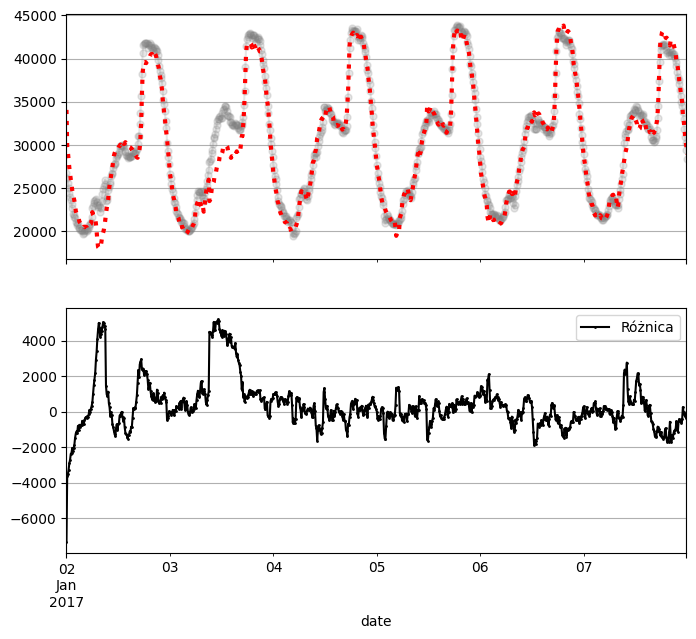

In [ ]:
# Różnicowanie
diff_1 = y1.diff(6 * 24)["2017-01-02":"2017-01-7"]          # 6 pomiarów (co 10 min) * 24h (doba)
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 7))

# Pierwotny szereg czasowy
y1["2017-01-02":"2017-01-8"].plot(ax=axs[0], legend=False, marker=".", ms=10, color='grey', alpha=0.2)
# Opóźniony o 1 dzień
y1["2017-01-01":"2017-01-8"].shift(6 * 24).plot(ax=axs[0], grid=True, legend=False, linestyle=":", lw=3, color="red")
# Szereg czasowy o jednodniowej różnicy
diff_1.plot(ax=axs[1], grid=True, marker=".", ms=2, color='black', label='Różnica')
plt.legend()

plt.show()

Widać, że różnica oscyluje w okolicach **2,000-4,000**... nie wiadomo jakichś tam jednostek wskazujących poziom Power Consumption.

Jest to całkiem niezły wynik, gdyż dla 1. strefy mieliśmy wartość średnią **32,345** oraz odchylenie standardowe **7,130**.

In [ ]:
# Średni błąd bezwzględny w okresie tych pierwszych 6 dni stycznia (strefa 1)
print("MAE (Mean absolute error): ", diff_1.abs().mean())

MAE (Mean absolute error):  907.9535866666666


In [ ]:
# Średni bezwzględny błąd procentowy
targets = y1["2017-01-02":"2017-01-07"]
print("MAPE (Mean absolute percentage error): ", 100 * (diff_1 / targets).abs().mean(), "%", sep='')

MAPE (Mean absolute percentage error): 3.0703106532535243%


Przygotujmy teraz wstępnie nasze dane:

In [ ]:
X = data.to_numpy()                                     # Dane wejściowe (w tym też zużycie energii)
y = data[['zone_1', 'zone_2', 'zone_3']].to_numpy()     # Cel (wyłącznie zużycie energii)
data_ordered_list = data.index                          # Uporządkowana lista dat (do mapowania)

Podzielmy teraz zbiór danych na treningowy (70%, czyli od stycznia do połowy września), walidacyjny (15%, czyli od września do początku listopada) oraz testowy (15%, czyli pozostałe dni aż do końca grudnia).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)

print("Zbiory treningowe:", X_train.shape, y_train.shape)
print("Zbiory walidacyjne:", X_val.shape, y_val.shape)
print("Zbiory testowe:", X_test.shape, y_test.shape)

Zbiory treningowe: (36691, 8) (36691, 3)
Zbiory walidacyjne: (7862, 8) (7862, 3)
Zbiory testowe: (7863, 8) (7863, 3)


Teraz możemy standaryzować dane (oczywiście, transformator skalujący trenujemy tylko na danych treningowych). Wartości przewidywanych nie będziemy skalować.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_val_stand = scaler.transform(X_val)
X_test_stand = scaler.transform(X_test)

In [ ]:
X_train[0:1]

array([[6.55900000e+00, 7.38000000e+01, 8.30000000e-02, 5.10000000e-02,
        1.19000000e-01, 3.40556962e+04, 1.61288754e+04, 2.02409639e+04]])

---


## 4. **LSTM (Rekurencyjna sieć neuronowa)**

### Eksperyment #1
**Zadanie:** Przewidujemy co będzie za 2 godziny
na podstawie danych z poprzednich 24 godzin.

Powinniśmy przygotować dane tak, by móc trenować rekurencyjną sieć.

In [ ]:
lookback = 144 # 24h przed
delay = 12     # za 2h

# Funkcja do przygotowania sekwencji (próbki będą przesunięte względem siebie o 10 minut,
# czyli tak naprawdę o jeden pomiar. Pozostałe część przed będzie się pokrywała)
def create_sequences(X, Y, delay):
    X_sequences, Y_sequences = [], []
    for i in range(len(X) - lookback - delay):
        X_seq = X[i: i + lookback, :]          # 1 stycznia, 15:00 (wczoraj) - 2 stycznia 15:00 (teraz)
        Y_seq = Y[i + lookback + delay]        # 2 stycznia, 17:00 (dzisiaj za niedługo)
        X_sequences.append(X_seq)
        Y_sequences.append(Y_seq)
    return np.array(X_sequences), np.array(Y_sequences)

# Tworzymy właściwe sekwencje (X - doba obserwacji razem z prawdziwym zużyciem, y - zużycie za 2h)
X_train_seq, y_train_seq = create_sequences(X_train_stand, y_train, delay)
X_val_seq, y_val_seq = create_sequences(X_val_stand, y_val, delay)
X_test_seq, y_test_seq = create_sequences(X_test_stand, y_test, delay)

In [ ]:
print("Sekwencje do trenowania: ", X_train_seq.shape, y_train_seq.shape)
print("Sekwencje do walidacji:  ", X_val_seq.shape, y_val_seq.shape)
print("Sekwencje do testowania: ", X_test_seq.shape, y_test_seq.shape)

Sekwencje do trenowania:  (36535, 144, 8) (36535, 3)
Sekwencje do walidacji:   (7706, 144, 8) (7706, 3)
Sekwencje do testowania:  (7707, 144, 8) (7707, 3)



---

Zbudujmy teraz rekurencyjną sieć neuronową
opierającą się na jednostkach LSTM. Będziemy stosować optymalizator Adam, który dynamicznie dostosowuje wartość współczynnika uczenia, by na razie nie marnować czasu na ustalenie wstępnych wartości hiperparametrów:

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, X_train_seq.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(units=32, dropout=0.1, recurrent_dropout=0.1, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer=Adam(), loss='mae')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, None, 32)          1312      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, None, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          5152      
                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 12899 (50.39 KB)
Trainable params: 12899 (50.39 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64,
          validation_data=(X_val_seq, y_val_seq))

Epoch 1/20
571/571 [==============================] - 41s 67ms/step - loss: 14390.7314 - val_loss: 20464.0078
Epoch 2/20
571/571 [==============================] - 38s 67ms/step - loss: 10451.3398 - val_loss: 19189.7539
Epoch 3/20
571/571 [==============================] - 39s 68ms/step - loss: 9304.3008 - val_loss: 16184.8252
Epoch 4/20
571/571 [==============================] - 38s 67ms/step - loss: 10875.5664 - val_loss: 15282.3887
Epoch 5/20
571/571 [==============================] - 40s 71ms/step - loss: 8789.9062 - val_loss: 16067.9688
Epoch 6/20
571/571 [==============================] - 37s 65ms/step - loss: 7470.7217 - val_loss: 14422.9092
Epoch 7/20
571/571 [==============================] - 37s 65ms/step - loss: 6365.7686 - val_loss: 13185.3203
Epoch 8/20
571/571 [==============================] - 37s 65ms/step - loss: 5709.0249 - val_loss: 11620.0732
Epoch 9/20
571/571 [==============================] - 37s 64ms/step - loss: 5131.6475 - val_loss: 10149.4590
Epoch 10/20
571/

In [ ]:
predictions = model.predict(X_val_seq)

241/241 [==============================] - 3s 10ms/step


In [ ]:
predictions.shape

(7706, 3)

In [ ]:
predictions[0:1]    # Przewidywanie (po pierwszych 100 minutach co będzie)

array([[39348.785, 24764.186, 25356.209]], dtype=float32)

In [ ]:
y_val[lookback + delay]       # Prawdziwa wartość (godz. 1:50)

array([45856.99115, 28276.09148, 21692.66599])

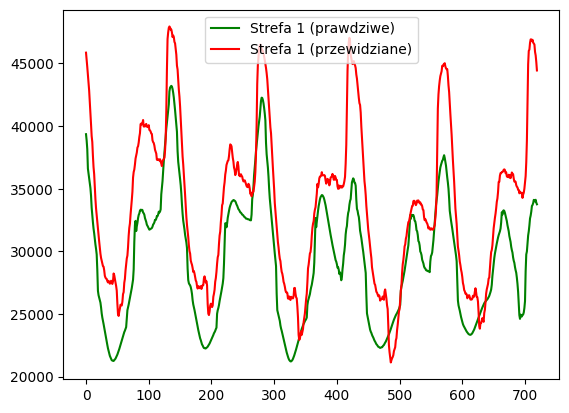

In [ ]:
plt.plot(range(24*6*5), predictions[0:24*6*5, 0], color='green',
         label='Strefa 1 (prawdziwe)')
plt.plot(range(24*6*5), y_val[lookback+delay:24*6*5+lookback+delay, 0], color='red',
         label='Strefa 1 (przewidziane)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_val[lookback+delay:], predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 3480.0026909461426


## Podział na zbiory treningowy, walidacyjny i testowy

In [ ]:
X = data.drop(['zone_1', 'zone_2', 'zone_3'], axis='columns')
y1 = data['zone_1']
y2 = data['zone_2']
y3 = data['zone_3']

In [ ]:
X_float = X.to_numpy()
y1_float = y1.to_numpy()
y2_float = y2.to_numpy()
y3_float = y3.to_numpy()

X_float.shape

(52416, 5)

In [ ]:
from sklearn.model_selection import train_test_split

# Pierwszy obszar
X_train, X_test, y1_train, y1_test = train_test_split(X_float, y1_float, test_size=0.3, shuffle=False)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, shuffle=False)
print(X_train.shape, y1_train.shape)
print(X_val.shape, y1_val.shape)
print(X_test.shape, y1_test.shape, '\n')

# Drugi obszar
X_train, X_test, y2_train, y2_test = train_test_split(X_float, y2_float, test_size=0.3, shuffle=False)
X_val, X_test, y2_val, y2_test = train_test_split(X_test, y2_test, test_size=0.5, shuffle=False)
print(X_train.shape, y2_train.shape)
print(X_val.shape, y2_val.shape)
print(X_test.shape, y2_test.shape, '\n')

# Trzeci obszar
X_train, X_test, y3_train, y3_test = train_test_split(X_float, y3_float, test_size=0.3, shuffle=False)
X_val, X_test, y3_val, y3_test = train_test_split(X_test, y3_test, test_size=0.5, shuffle=False)
print(X_train.shape, y3_train.shape)
print(X_val.shape, y3_val.shape)
print(X_test.shape, y3_test.shape)

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,) 

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,) 

(36691, 5) (36691,)
(7862, 5) (7862,)
(7863, 5) (7863,)


## Model ARIMA



Zacznijmy od stworzenia modelu ARIMA dla 1. strefy. Wartości parametrów modelu ARIMA (p, d, q) będziemy dobierać na podstawie analizy ACF i PACF.
p - liczba opóźnień autoregresji
d - stopień różnicowania
q - liczba opóźnień średniej ruchomej

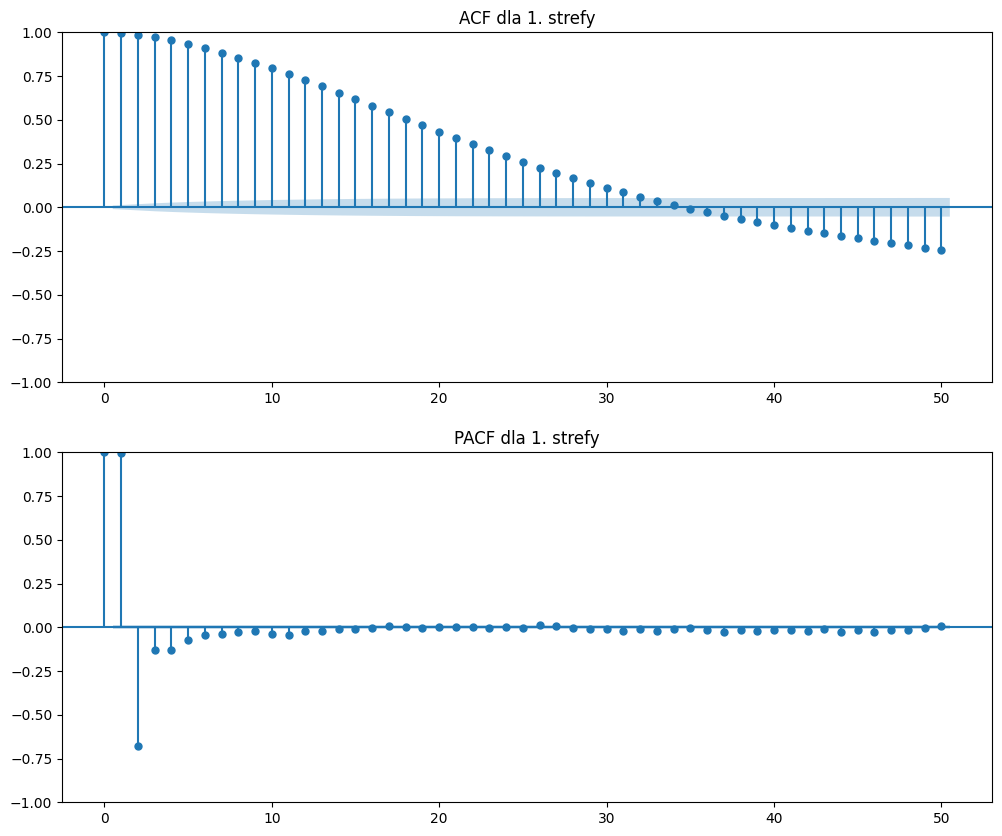

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF i PACF dla 1. strefy
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(y1_train, ax=axs[0], lags=50, title="ACF dla 1. strefy")

plot_pacf(y1_train, ax=axs[1], lags=50, title="PACF dla 1. strefy")

plt.show()

Widać, że ACF dla paru pierwszych opóźnień jest znaczący, czyli zużycie energii w sporym stopniu zależy od zużycia energii w dniach poprzednich.
Natomiast ACF dla 1. strefy maleje do zera, co sugeruje, że nie ma sezonowości. PACF dla 1. strefy jest znaczący tylko dla pierwszego opóźnienia

In [ ]:
!pip install pmdarima


In [ ]:
## Automatyczne dobieranie parametrów modelu ARIMA
from pmdarima import auto_arima

# Dobieranie parametrów modelu ARIMA
model = auto_arima(y1_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=False)


print(model.summary())

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=580053.304, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=565322.915, Time=23.20 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=561317.986, Time=20.56 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=559422.734, Time=28.44 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=557246.679, Time=3.42 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=556526.837, Time=9.87 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=556173.850, Time=10.47 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=556175.823, Time=14.90 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=556754.168, Time=5.78 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=57.50 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=556175.853, Time=11.17 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=556177.445, Time=14.52 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=556278.777, Time=9.78 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=556175.155, Time=26.25 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=5561

#### Najlepszy model: (1, 1, 2)

[    0.         55317.28646962 48259.0057735  ... 23350.81424309
 24166.85858601 24691.17096639]


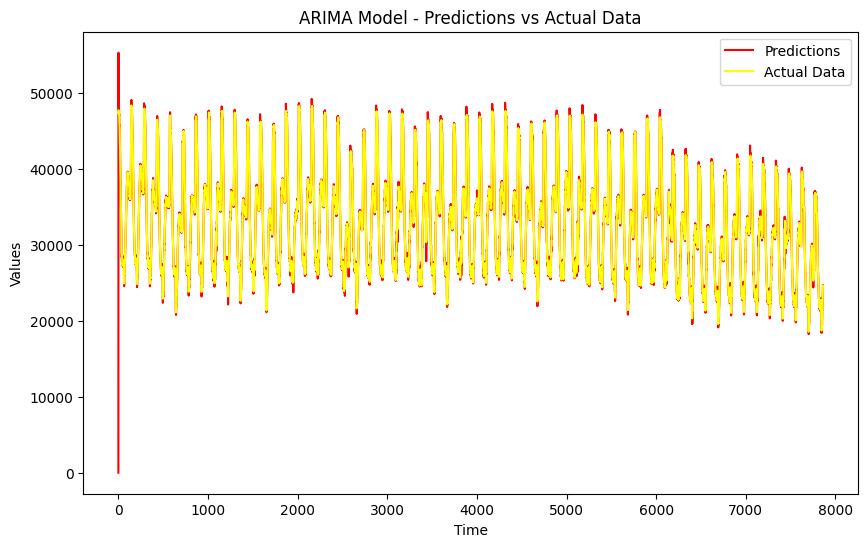

Mean Squared Error (MSE) dla pierwszego targetu: 460516.6389697223
Mean Absolute Error (MAE) dla pierwszego targetu: 278.4204843111632
Mean Absolute Percentage Error (MAPE) dla pierwszego targetu: 0.8554354590913468


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Wczytanie najlepszego modelu ARIMA
best_order = (1, 1, 2)  # zgodnie z wynikami
best_model = ARIMA(y1_val, order=best_order)

# Dopasowanie modelu do danych walidacyjnych
best_model_fit = best_model.fit()

# Przewidywanie na danych walidacyjnych
predictions = best_model_fit.predict()

# Wyświetlenie predykcji
print(predictions)

# Narysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predictions')
plt.plot(y1_val, label='Actual Data', color='yellow')

plt.title('ARIMA Model - Predictions vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Obliczenie MSE dla pierwszego targetu
mse_y1 = mean_squared_error(y1_val, predictions)
print("Mean Squared Error (MSE) dla pierwszego targetu:", mse_y1)

# Obliczenie MAE dla pierwszego targetu
mae_y1 = mean_absolute_error(y1_val, predictions)
print("Mean Absolute Error (MAE) dla pierwszego targetu:", mae_y1)

# Obliczenie MAP dla pierwszego targetu
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

map_y1 = mean_absolute_percentage_error(y1_val, predictions)
print("Mean Absolute Percentage Error (MAPE) dla pierwszego targetu:", map_y1)

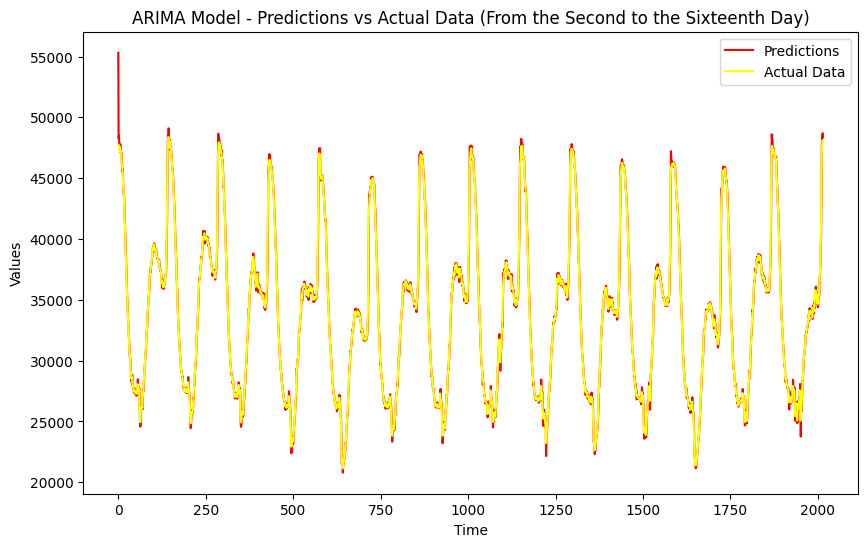

In [ ]:
# Narysowanie wykresu tylko dla pierwszych 14 dni
plt.figure(figsize=(10, 6))
plt.plot(predictions[1: 24*6 * 14], color='red', label='Predictions')
plt.plot(y1_val[1: 24*6 * 14], label='Actual Data', color='yellow')

plt.title('ARIMA Model - Predictions vs Actual Data (From the Second to the Sixteenth Day)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


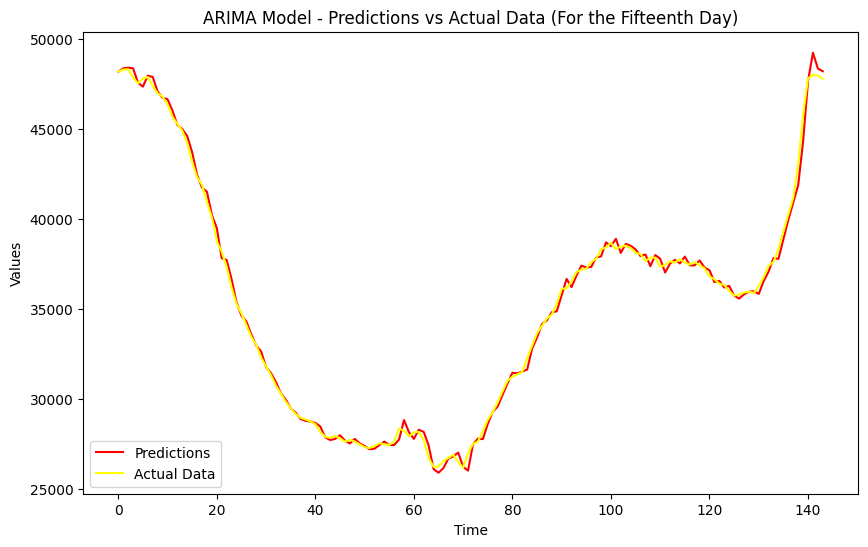

In [ ]:
# Narysowanie wykresu tylko dla 15 dnia
plt.figure(figsize=(10, 6))
plt.plot(predictions[24*6 * 14: 24*6 * 15], color='red', label='Predictions')
plt.plot(y1_val[24*6 * 14: 24*6 * 15], label='Actual Data', color='yellow')

plt.title('ARIMA Model - Predictions vs Actual Data (For the Fifteenth Day)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()